# Robust_Scaler

Outliars are one of the worst nightmares which hauts every single data scientist. Outliars are the data which do not match with the regular structure of the dataset, generally originate due to mis-interpretation of data. From it's name, you can conclude that these are data who are lying about the behaviour of the data while standing out.

But there is a good news that we have a predefined function in the preprocessing class provided by sklearn library.

Normally, we try to get rid of Outliars using means and standard deviation, by removing all the data more than 2 or 3 standard deviation from the mean. But it has some serious problems which could not be neglected.

* Firstly, when we use mean, we assume that the distribution is normal, because when we remove data more than 3 standard SD from mean, we are taking 99.87% according to Normal Distribution.

* Secondly, mean and standard deviation are greatly impacted by Outliars.

* Thirdly, this method will decrease the accuracy when applying on small dataset.

In [1]:
from sklearn.preprocessing import robust_scale

Robust_Scaler is going to use more robust metrics and methods to scale your data.

The most important feature which Robust_scaler uses is, it is based on percentiles, and because of that, it does not get affected by large marginal values, also called OUTLIARS.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

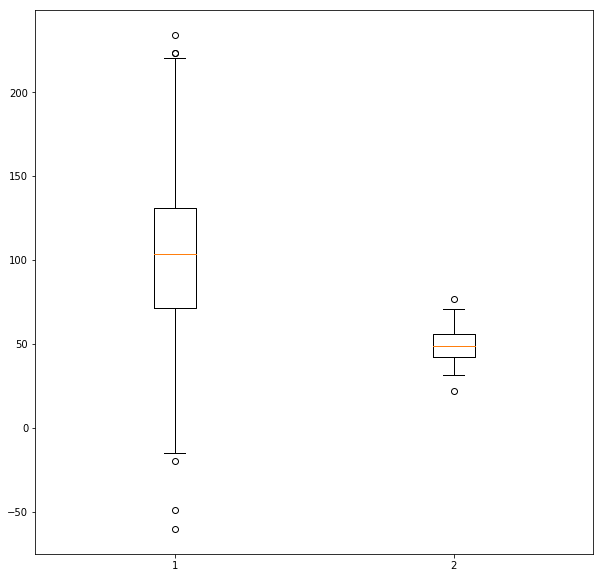

In [22]:
np.random.seed(10)
array_1 = np.random.normal(100,50,500)
array_2 = np.random.normal(50,100,100)

data = [array_1,array_2]
plt.figure(figsize=(10,10))
plt.boxplot(data)
plt.show()

If you will look at the above boxplot, you will find the ouliers marked by a circle. The box depicts the interquartile range(IQR) and the line in middle is the median(50th percentile). The upper end marks the highest data value that is still within the Q3(75th percentile value + 1.5 x IQR) and similarly the lower end marks the lowest data value that is still within the Q1(25th percentlie value + 1.5 x IQR).

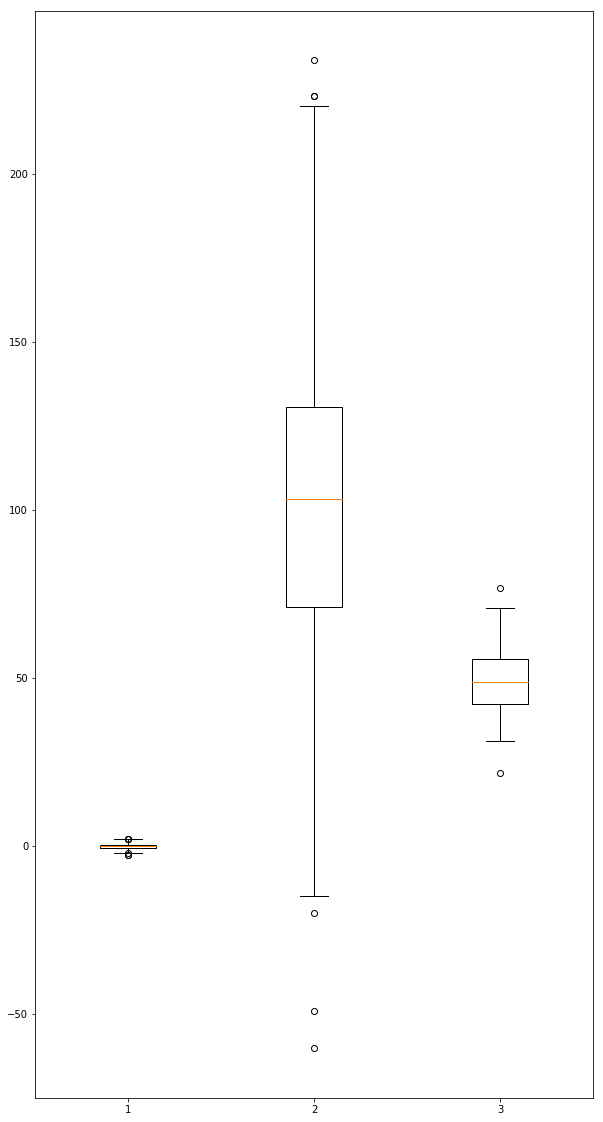

In [40]:
array_1_copy = robust_scale(array_1.reshape(-1,1), with_centering=False)# Had to reshape because the array cannot be 1D
data = [array_1_copy,array_1,array_2]
plt.figure(figsize=(10,20))
plt.boxplot(data)#Comapring the previous data with the modified data
plt.show()

When we are using robust_scale function, the outliars are removed using this definition:

Outliers are values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1) or equivalently, values below Q1-1.5 IQR or above Q3+1.5 IQR.

Interquartile range (IQR) normalization forces the distributions to have the same values for the 25th and 75th percentiles (Geller et al., 2003)

When we use with_centering=True, the data is centered according to the median.

# References

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale